In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import tensorflow as tf


In [3]:
# Setting up the time range for data collection
start = "2010-01-01"
today = datetime.now()
yesterday = today - timedelta(days=1)
end = yesterday.strftime('%Y-%m-%d')

'2024-08-06'

In [4]:
# Downloading Tesla stock data
df = yf.download("TSLA", start=start, end=end)
df = df.reset_index().drop(["Date", "Adj Close"], axis=1)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300
2024-07-31,227.899994,234.679993,226.789993,232.070007,232.070007,67497000
2024-08-01,227.690002,231.869995,214.330002,216.860001,216.860001,83861900


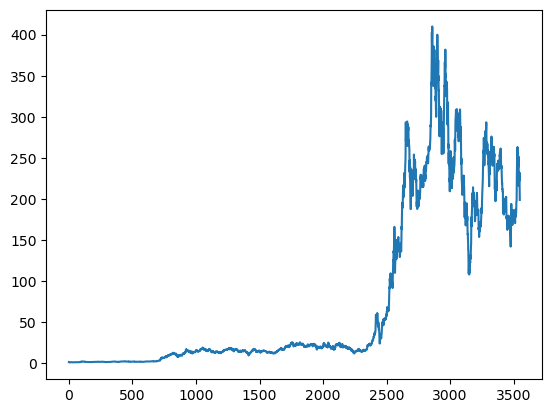

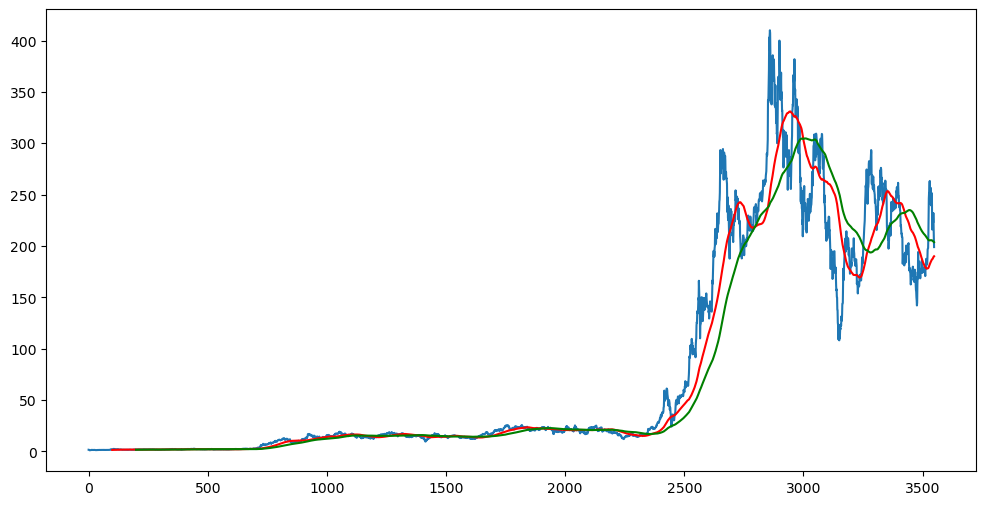

In [7]:
# Calculating moving averages
feature = df.Close
ma100 = feature.rolling(100).mean()
ma200 = feature.rolling(200).mean()

# Plotting the stock prices along with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label='Close Price')
plt.plot(ma100, "r", label='100-Day MA')
plt.plot(ma200, "g", label='200-Day MA')
plt.legend()
plt.show()

In [31]:
# Splitting data into training and testing sets
data_training = pd.DataFrame(df['Close'][:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.30):])

In [23]:

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)

In [43]:
# Creating the training dataset
x_train, y_train = [], []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [52]:
# Defining the LSTM model
model = Sequential()

# Adding LSTM and Dropout layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(60, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(120))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Printing the model summary
model.summary()

2024-08-08 13:54:38.484675: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-08-08 13:54:38.485635: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-08 13:54:38.485649: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-08 13:54:38.485954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-08 13:54:38.485971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/direwolfsy/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Training the model
model.fit(x_train, y_train, epochs=50)

# Saving the model
model.save("stock_LSTM.h5")


Epoch 1/50


2024-08-08 13:55:49.761942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0098
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0027
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0026
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0024
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0022
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0017
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0022
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0013
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0017
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0015
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0017
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0015
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0015
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0016
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0014
Epoch 16/50
75/

In [57]:
# Preparing the test data
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
input_data = scaler.fit_transform(final_df)

,Close
0,25.266001
1,26.209999
2,26.936001
3,27.039333
4,27.948000
...,...
2580,222.619995
2581,232.070007
2582,216.860001
2583,207.669998


In [60]:

# Creating the test dataset
x_test, y_test = [], []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

(2585, 1)

In [61]:
# Making predictions
y_predicted = model.predict(x_test)

# Scaling back the data to the original values
scale_factor = 1 / scaler.scale_[0]
y_predicted_unscaled = y_predicted * scale_factor
y_test_unscaled = y_test * scale_factor


(2485, 100, 1)
(2485,)


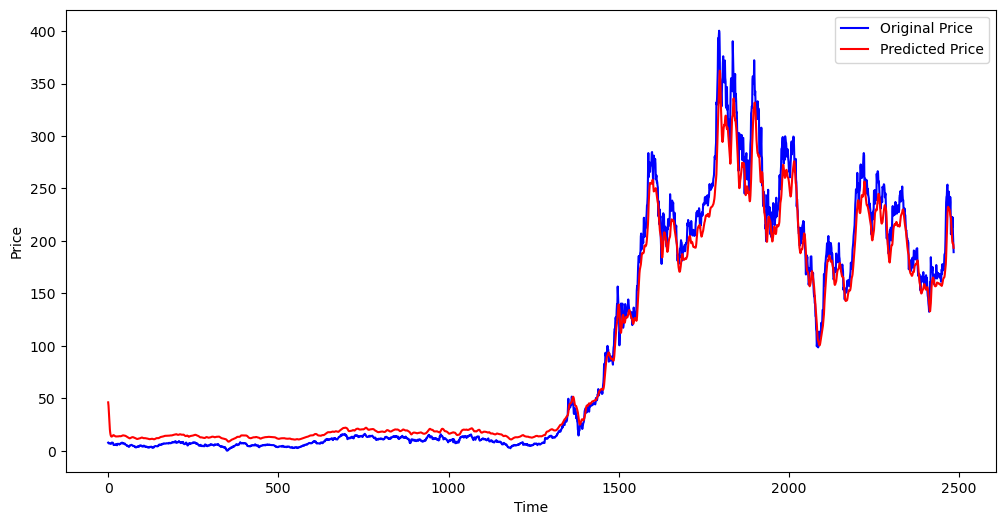

In [69]:
# Plotting the original vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, 'b', label='Original Price')
plt.plot(y_predicted_unscaled, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [71]:
# Calculating and displaying the R-squared value
r2 = r2_score(y_test_unscaled, y_predicted_unscaled)
print(f"R-squared: {r2}")

R-squared: 0.9824003579913297
